## Muhammad Fazril Fahri
## AIH KELAS C - Universitas Ahmad Dahlan - 149294373101-1057

In [19]:
import tensorflow as tf
# Memuat dataset Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

# Normalisasi nilai piksel ke dalam rentang [0, 1]
train_X = train_X / 255.0
test_X = test_X / 255.0

# Memeriksa bentuk data
print("Bentuk data pelatihan:", train_X.shape)  # Seharusnya (60000, 28, 28) untuk 60.000 gambar berukuran 28x28 piksel
print("Bentuk data pengujian:", test_X.shape)    # Seharusnya (10000, 28, 28) untuk 10.000 gambar berukuran 28x28 piksel

# Memeriksa bentuk label
print("Bentuk label pelatihan:", train_Y.shape)  # Seharusnya (60000,)
print("Bentuk label pengujian:", test_Y.shape)


Bentuk data pelatihan: (60000, 28, 28)
Bentuk data pengujian: (10000, 28, 28)
Bentuk label pelatihan: (60000,)
Bentuk label pengujian: (10000,)


In [20]:
from collections import Counter
len(Counter((train_Y)))

10

In [21]:
import numpy as np  # Mengimpor library NumPy untuk operasi numerik

# Mencetak dimensi dan label unik dalam data pelatihan
print('Dimensi Data Pelatihan', train_X.shape)  # Mencetak bentuk data pelatihan (misalnya, (60000, 28, 28))
print('Dimensi Label Pelatihan:', train_Y.shape)  # Mencetak bentuk label pelatihan (biasanya hanya jumlah sampel)
print('Label pelatihan:', np.unique(train_Y))  # Mencetak label unik dalam data pelatihan

# Mencetak dimensi dan label unik dalam data pengujian
print('')
print('Dimensi Data Pengujian', test_X.shape)  # Mencetak bentuk data pengujian (mirip dengan data pelatihan)
print('Dimensi Label Pengujian', test_Y.shape)  # Mencetak bentuk label pengujian
print('Label pengujian:', np.unique(test_Y))  # Mencetak label unik dalam data pengujian


Dimensi Data Pelatihan (60000, 28, 28)
Dimensi Label Pelatihan: (60000,)
Label pelatihan: [0 1 2 3 4 5 6 7 8 9]

Dimensi Data Pengujian (10000, 28, 28)
Dimensi Label Pengujian (10000,)
Label pengujian: [0 1 2 3 4 5 6 7 8 9]


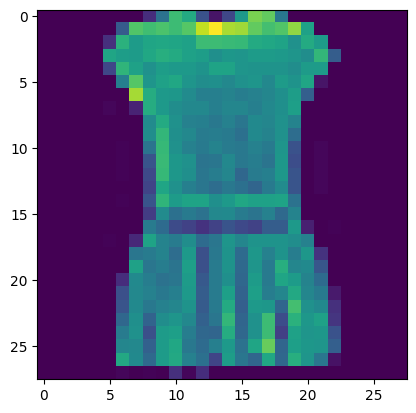

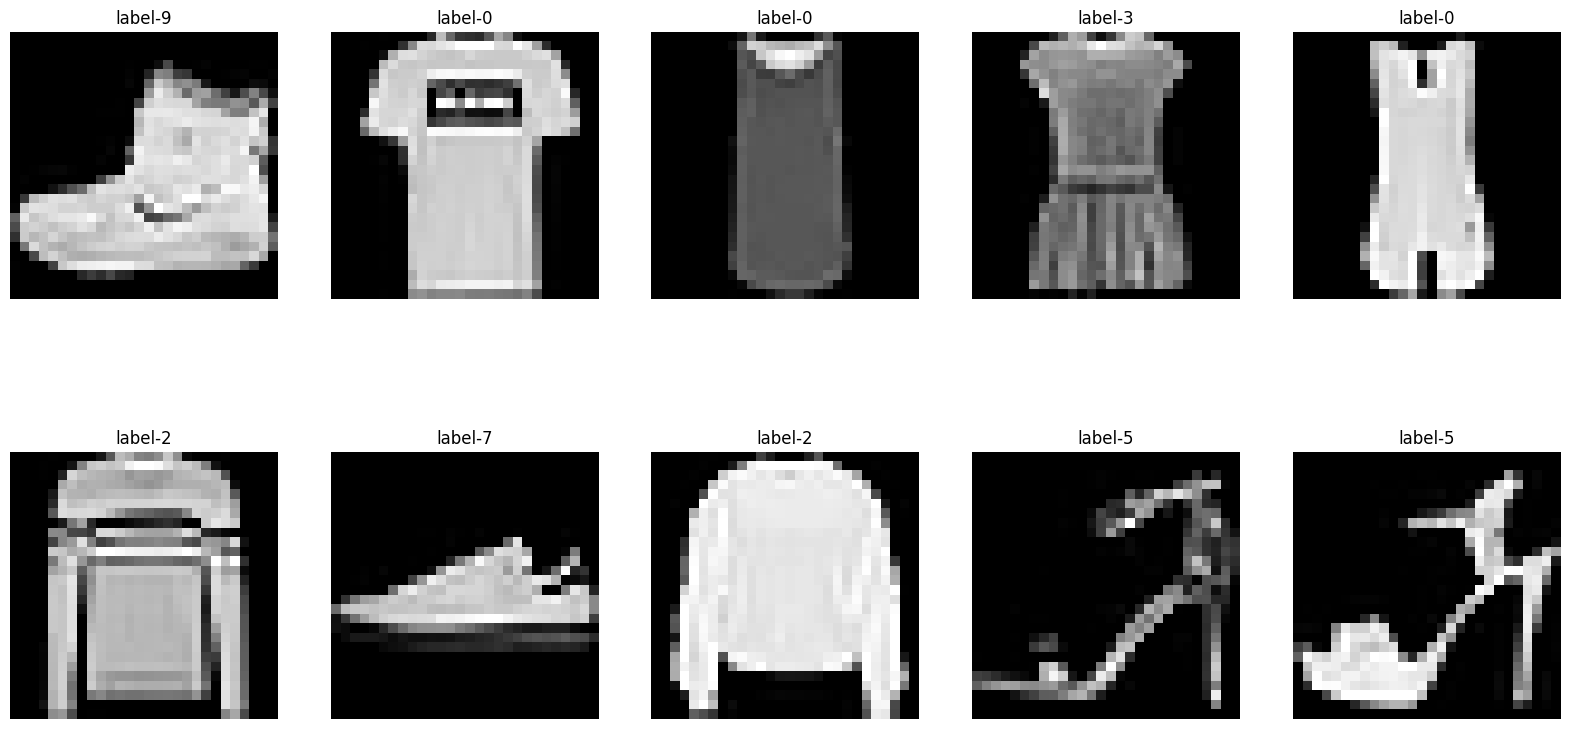

In [22]:
import matplotlib.pyplot as plt  # Mengimpor library matplotlib untuk visualisasi

# Menampilkan gambar individu dari dataset Fashion MNIST
plt.imshow(train_X[3])  # Menampilkan gambar ke-4 dari dataset pelatihan (indeks dimulai dari 0)

# Menampilkan beberapa gambar sampel dengan label
ax1 = plt.figure(figsize=(20, 10))  # Membuat gambar utama dengan ukuran 20x10
count = 1  # Menginisialisasi hitungan untuk subplot

# Mengulang sebanyak 10 kali untuk menampilkan 10 gambar sampel
for i in range(10):
    plt.subplot(2, 5, count)  # Membuat subplot dalam grid 2x5
    plt.imshow(train_X[i], cmap='gray')  # Menampilkan gambar dalam skala abu-abu
    plt.title('label-' + str(train_Y[i]))  # Menambahkan judul berdasarkan label gambar
    plt.axis('off')  # Menyembunyikan sumbu x dan y
    count += 1  # Meningkatkan hitungan untuk subplot berikutnya

# Menampilkan gambar-gambar yang telah dibuat
plt.show()


# Preprocessing Data

In [23]:
print('Sebelum one-hot encoding', train_Y[0])  # Mencetak label pertama sebelum one-hot encoding

train_label = tf.keras.utils.to_categorical(train_Y, num_classes=10)  # Melakukan one-hot encoding pada label pelatihan
test_label = tf.keras.utils.to_categorical(test_Y, num_classes=10)  # Melakukan one-hot encoding pada label pengujian

print('Setelah One-Hot Encoding', train_label[0])  # Mencetak label pertama setelah one-hot encoding


Sebelum one-hot encoding 9
Setelah One-Hot Encoding [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [24]:
train_input = tf.data.Dataset.from_tensor_slices((train_X,train_label)).batch(50)
test_input = tf.data.Dataset.from_tensor_slices((test_X,test_label)).batch(50)

print('length of training input:', len(train_X))
print('length of training input after setting batch', len(train_input))
train_input

length of training input: 60000
length of training input after setting batch 1200


<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [25]:
input_data=tf.keras.Input([28,28])
input_data

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

In [26]:
dense=tf.keras.layers.Flatten()(input_data)
dense

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'flatten_1')>

# mendefinisikan hidden layer

In [27]:
dense=tf.keras.layers.Dense(100,activation='relu')(dense)
dense=tf.keras.layers.Dense(100,activation='relu')(dense)
dense=tf.keras.layers.Dense(100,activation='relu')(dense)
dense=tf.keras.layers.Dense(100,activation='relu')(dense)

In [28]:
output_data=tf.keras.layers.Dense(10,activation='softmax')(dense)

In [29]:
# Membuat objek model dengan menghubungkan input_data ke output_data
model=tf.keras.Model(inputs=input_data,outputs=output_data)

In [30]:
# Mengompilasi model dengan pengaturan pelatihan
model.compile(
    optimizer=tf.optimizers.Adam(0.001),  # Pengoptimalan menggunakan Adam dengan laju belajar 0,001
    loss=tf.losses.categorical_crossentropy,  # Menggunakan categorical cross-entropy sebagai fungsi kerugian
    metrics=['accuracy']  # Mengukur akurasi sebagai metrik kinerja selama pelatihan
)


In [31]:
# Menampilkan ringkasan arsitektur model
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010

In [32]:
# Melatih model dengan data pelatihan
model.fit(train_input, epochs=50)


Epoch 1/50
1200/1200 [==============================] - 7s 4ms/step - loss: 0.5089 - accuracy: 0.8170
Epoch 2/50
1200/1200 [==============================] - 4s 4ms/step - loss: 0.3764 - accuracy: 0.8626
Epoch 3/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3393 - accuracy: 0.8726
Epoch 4/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3120 - accuracy: 0.8834
Epoch 5/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2944 - accuracy: 0.8893
Epoch 6/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2784 - accuracy: 0.8940
Epoch 7/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2650 - accuracy: 0.8988
Epoch 8/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2547 - accuracy: 0.9022
Epoch 9/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2475 - accuracy: 0.9054
Epoch 10/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.236

In [33]:
# Mengukur kinerja model dengan data pengujian
model.evaluate(test_input)


200/200 [==============================] - 1s 2ms/step - loss: 0.7442 - accuracy: 0.8842


[0.7441594004631042, 0.8841999769210815]

1/1 [==============================] - 0s 18ms/step


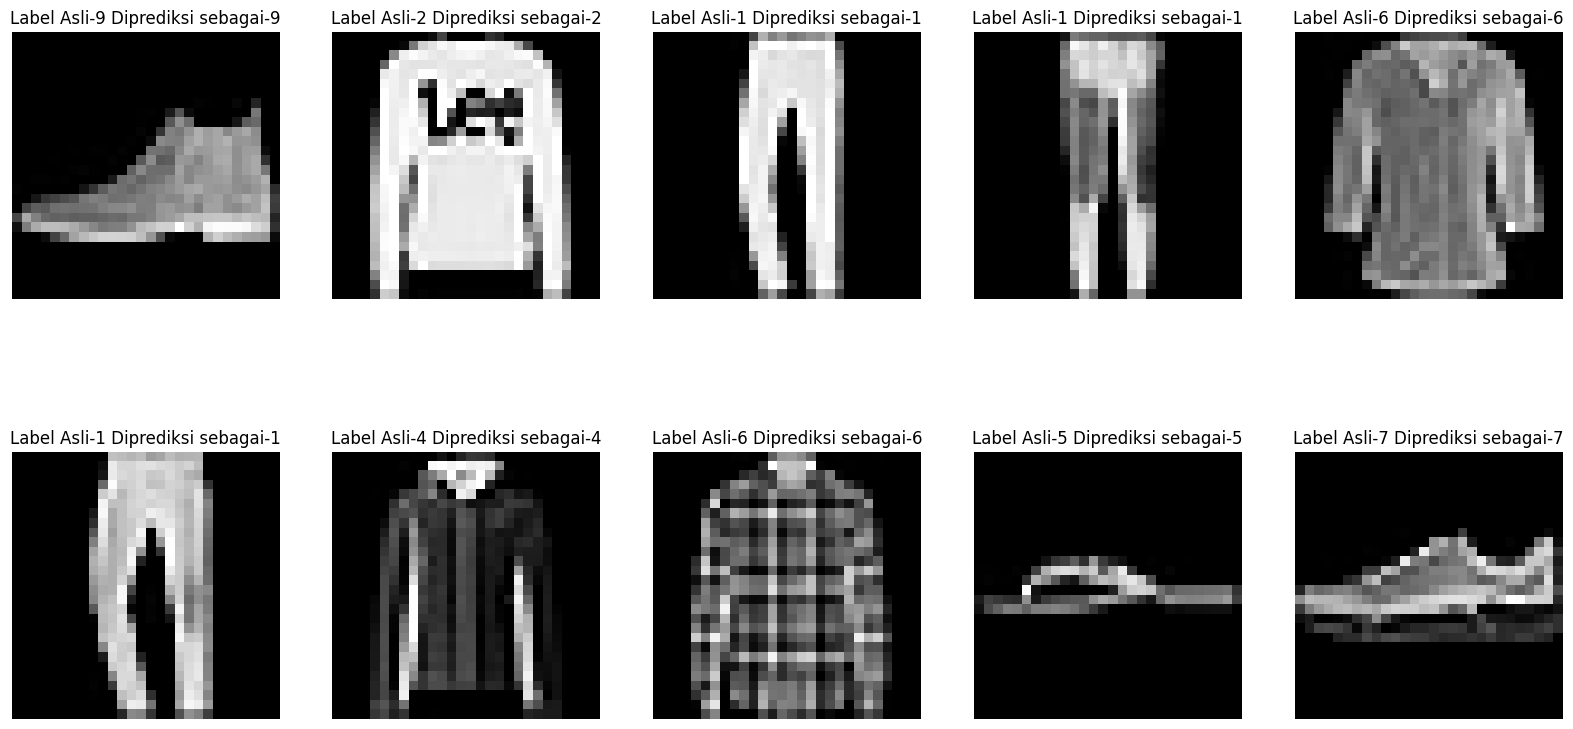

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat gambar untuk menampilkan gambar-gambar sampel
ax1 = plt.figure(figsize=(20,10))
count = 1

# Mengulang sebanyak 10 kali untuk menampilkan 10 gambar sampel
for i in range(10):
    plt.subplot(2, 5, count)
    plt.imshow(test_X[i], cmap='gray')

    # Melakukan prediksi label menggunakan model
    result = model.predict(tf.expand_dims(test_X[i], axis=0))

    # Menampilkan prediksi dalam judul gambar
    plt.title('Label Asli-' + str(test_Y[i]) + ' Diprediksi sebagai-' + str(np.argmax(result))), plt.axis('off')
    count += 1


In [35]:
# Menambahkan dimensi baru pada data pelatihan dan data pengujian
train_data = tf.expand_dims(train_X, -1)
test_data = tf.expand_dims(test_X, -1)

# Mengecek bentuk (shape) dari train_data
train_data.shape


TensorShape([60000, 28, 28, 1])

In [36]:
# Membuat dataset dari tensor data pelatihan dan label pelatihan yang sudah diubah bentuk
train_input = tf.data.Dataset.from_tensor_slices((train_data, train_label)).batch(50)

# Membuat dataset dari tensor data pengujian dan label pengujian yang sudah diubah bentuk
test_input = tf.data.Dataset.from_tensor_slices((test_data, test_label)).batch(50)


In [37]:
# Mendefinisikan input data sebagai tensor 3D dengan bentuk [28, 28, 1]
input_data = tf.keras.layers.Input([28, 28, 1])


In [38]:

# Menambahkan lapisan konvolusi pertama
conv=tf.keras.layers.Conv2D(30,5,padding='SAME',activation='relu')(input_data)

# Menambahkan lapisan konvolusi kedua
conv=tf.keras.layers.Conv2D(30,5,padding='SAME',activation='relu')(conv)


In [39]:
# Menambahkan lapisan MaxPooling
conv=tf.keras.layers.MaxPool2D(strides=[2,2])(conv)

# Menambahkan lapisan konvolusi ketiga
conv=tf.keras.layers.Conv2D(30,5,padding='SAME',activation='relu')(conv)


In [40]:
# Mengubah output dari lapisan konvolusi menjadi vektor
dense = tf.keras.layers.Flatten()(conv)

# Lapisan fully connected dengan aktivasi softmax
output_data = tf.keras.layers.Dense(10, activation='softmax')(dense)


In [41]:
# Membuat model dengan definisi input_data dan output_data
model = tf.keras.Model(inputs=input_data, outputs=output_data)

# Mengompilasi model dengan pengaturan pelatihan
model.compile(
    optimizer=tf.optimizers.Adam(0.001),  # Pengoptimalan menggunakan Adam dengan laju belajar 0,001
    loss=tf.losses.categorical_crossentropy,  # Menggunakan categorical cross-entropy sebagai fungsi kerugian
    metrics=['accuracy']  # Mengukur akurasi sebagai metrik kinerja selama pelatihan
)

# Menampilkan ringkasan arsitektur model
model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 30)        780       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 30)        22530     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 30)        22530     
                                                                 
 flatten_2 (Flatten)         (None, 5880)              0         
                                                           

In [42]:
# Melatih model dengan data pelatihan selama 30 epoch
model.fit(train_input, epochs=50)

# Mengevaluasi kinerja model dengan data pengujian
model.evaluate(test_input)


Epoch 1/50
1200/1200 [==============================] - 12s 5ms/step - loss: 0.4155 - accuracy: 0.8517
Epoch 2/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2668 - accuracy: 0.9034
Epoch 3/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2241 - accuracy: 0.9186
Epoch 4/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1931 - accuracy: 0.9302
Epoch 5/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1669 - accuracy: 0.9401
Epoch 6/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1447 - accuracy: 0.9481
Epoch 7/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1261 - accuracy: 0.9545
Epoch 8/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1084 - accuracy: 0.9605
Epoch 9/50
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0974 - accuracy: 0.9641
Epoch 10/50
1200/1200 [==============================] - 6s 5ms/step - loss: 0.08

[1.0655134916305542, 0.9156000018119812]

In [43]:
# Menyimpan model ke dalam file dengan format .h5
model.save('./model.h5')


In [44]:
# Memuat kembali model dari file .h5
modelx = tf.keras.models.load_model('./model.h5')

# Mengevaluasi kinerja model yang telah dimuat kembali dengan data pengujian
modelx.evaluate(test_input)


200/200 [==============================] - 1s 4ms/step - loss: 1.0655 - accuracy: 0.9156


[1.0655134916305542, 0.9156000018119812]

1/1 [==============================] - 0s 18ms/step


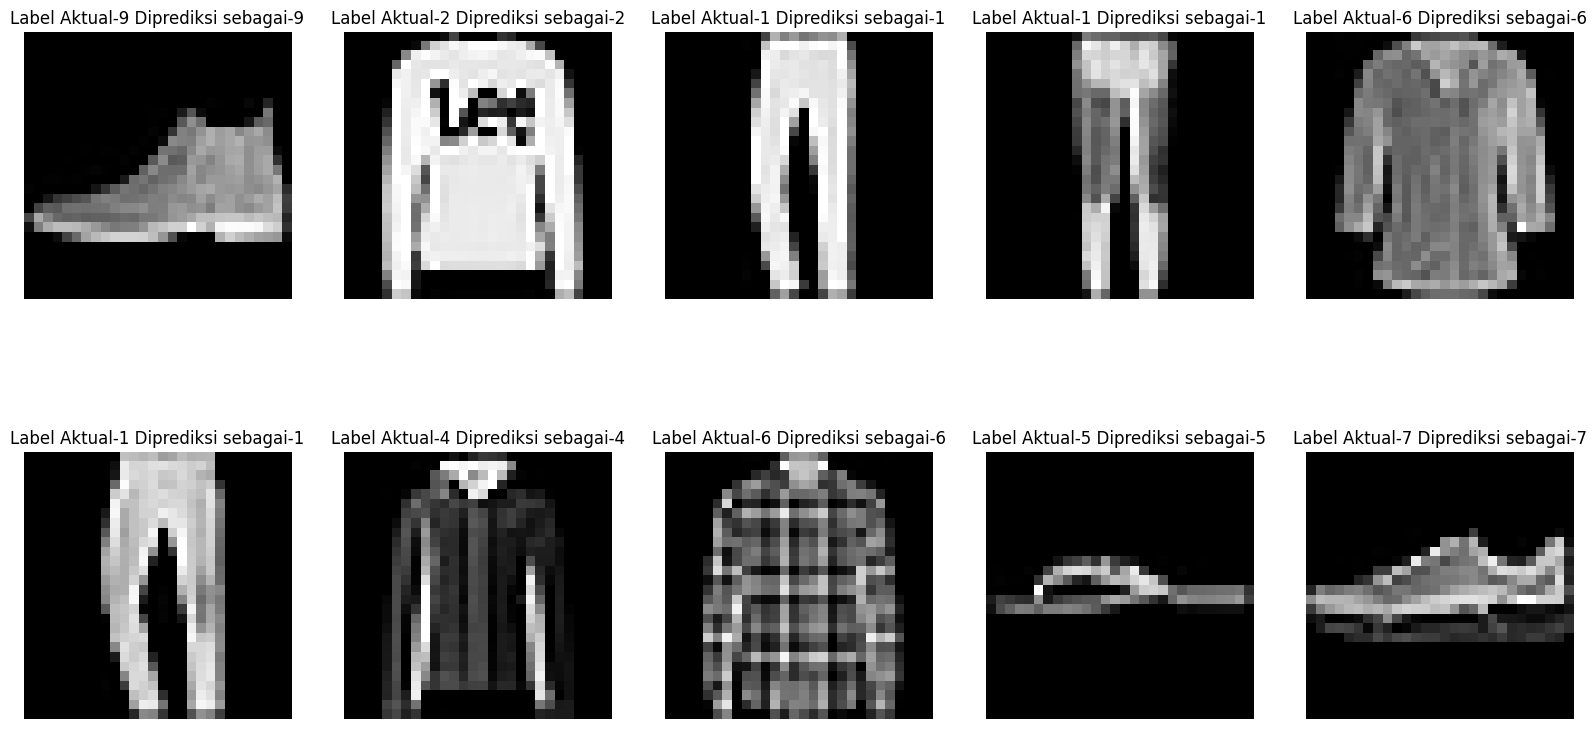

In [45]:
import matplotlib.pyplot as plt

# Tampilkan gambar sampel
ax1 = plt.figure(figsize=(20,10))
count = 1
for i in range(10):
    plt.subplot(2,5,count)
    plt.imshow(test_X[i], cmap='gray')

    # Prediksi label
    result = modelx.predict(tf.expand_dims(test_X[i], axis=0))

    # Tampilkan prediksi pada judul gambar
    plt.title('Label Aktual-' + str(test_Y[i]) + ' Diprediksi sebagai-' + str(np.argmax(result))), plt.axis('off')
    count += 1


Berdasarkan hasil program, model CNN dengan 3 lapisan konvolusi dan 1 lapisan fully connected mampu mencapai akurasi **98,81%** pada data pelatihan dan **91,56% ** pada data pengujian. Akurasi yang tinggi pada data pelatihan menunjukkan bahwa model telah belajar dengan baik dari data pelatihan.

Berdasarkan hasil program, dapat disimpulkan bahwa model CNN dapat digunakan untuk mengklasifikasikan gambar fashion dengan akurasi yang tinggi.

